In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from sklearn.linear_model import LinearRegression

%matplotlib inline

In [2]:
df = pd.read_csv('master_df_clean.csv')

In [3]:
df.shape

(14306, 15)

In [4]:
df.head(5)

,year,iso,country_or_area,region,continent,number_of_disasters,total_human_affected,temperature,precipitation,cropland,country_area,cropland_pct,variant,population,rice_production_in_tonnes
0,1961,BGD,Bangladesh,Southern Asia,Asia,3.0,11266.0,24.916975,198.28148,8880.0,14846.0,0.598141,Medium,49362.843,9622265.0
1,1961,BLZ,Belize,Central America,Americas,1.0,275.0,25.318518,199.05833,42.0,2297.0,0.018285,Medium,94.703,566.0
2,1961,CAN,Canada,Northern America,Americas,1.0,0.0,-7.946412,34.59439,36695.0,987975.0,0.037142,Medium,18233.964,NaN
3,1961,ETH,Ethiopia,Eastern Africa,Africa,1.0,30.0,22.493770,68.36165,11486.0,122190.0,0.094001,Medium,22671.191,NaN
4,1961,FRA,France,Western Europe,Europe,1.0,21.0,11.384623,65.22725,21405.0,54908.6,0.389830,Medium,46266.981,89171.0


In [5]:
top_list =['CHN', 'IND', 'IDN', 'BGD', 'VNM', 'THA', 'MMR', 'JPN', 'PHL', 'BRA', 'USA', 'KOR', 'PAK', 'KHM']

In [6]:
df_top = df.loc[df['iso'].isin(top_list)]
df_top.head(5)

,year,iso,country_or_area,region,continent,number_of_disasters,total_human_affected,temperature,precipitation,cropland,country_area,cropland_pct,variant,population,rice_production_in_tonnes
0,1961,BGD,Bangladesh,Southern Asia,Asia,3.0,11266.0,24.916975,198.281480,8880.0,14846.0,0.598141,Medium,49362.843,9622265.0
8,1961,IND,India,Southern Asia,Asia,5.0,5457.0,23.493069,100.191810,160986.0,328726.0,0.489727,Medium,459642.165,35680829.0
10,1961,JPN,Japan,Eastern Asia,Asia,4.0,1302912.0,11.949110,142.934950,6010.0,37780.0,0.159079,Medium,94560.709,10779013.0
11,1961,KOR,Korea (the Republic of),Eastern Asia,Asia,1.0,249.0,12.037022,129.555880,2095.0,9926.0,0.211062,Medium,26084.031,3120893.0
17,1961,USA,United States of America (the),Northern America,Americas,2.0,146.0,6.492202,57.870647,182509.0,962909.0,0.189539,Medium,189569.843,1639486.0


In [7]:
df_top.shape

(826, 15)

In [8]:
col = df_top.columns

In [9]:
# check waht percentage of each column is missing
for c in col:
    print(f" percentage of missing data in {c} is {df_top[c].isna().sum()/df_top.shape[0]*100}.")

 percentage of missing data in year is 0.0.
 percentage of missing data in iso is 0.0.
 percentage of missing data in country_or_area is 0.0.
 percentage of missing data in region is 14.648910411622277.
 percentage of missing data in continent is 14.648910411622277.
 percentage of missing data in number_of_disasters is 0.0.
 percentage of missing data in total_human_affected is 0.0.
 percentage of missing data in temperature is 11.864406779661017.
 percentage of missing data in precipitation is 11.864406779661017.
 percentage of missing data in cropland is 0.0.
 percentage of missing data in country_area is 0.0.
 percentage of missing data in cropland_pct is 0.0.
 percentage of missing data in variant is 0.0.
 percentage of missing data in population is 0.0.
 percentage of missing data in rice_production_in_tonnes is 0.0.


In [10]:
# drop rows with missed temperature and precipitation data (~%12 of the data)
df_top = df_top.dropna(subset=['temperature', 'precipitation'])

In [11]:
df_top.shape

(728, 15)

In [12]:
# creeat a subset of columns as our model's predictors
col_sub = ['number_of_disasters', 'total_human_affected', 'temperature',
       'precipitation', 'cropland']

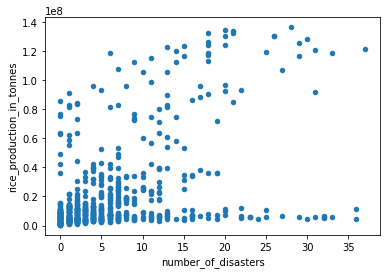

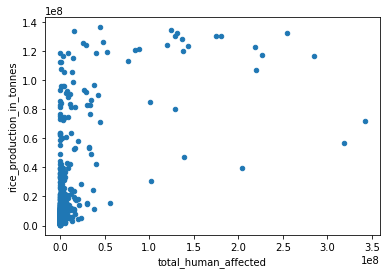

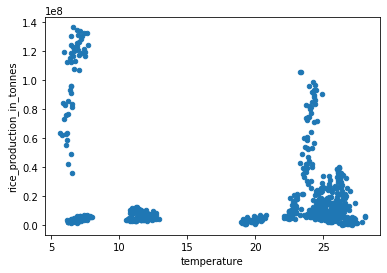

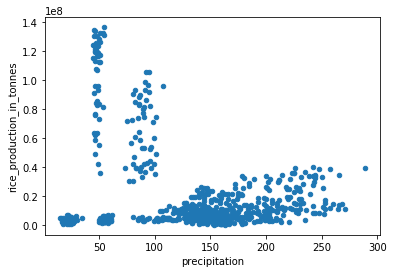

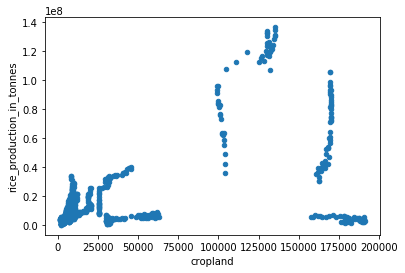

In [13]:
# scatterplots for rice production vs each predictor
for c in col_sub:
    df_top.plot(kind='scatter', x=c, y='rice_production_in_tonnes');

In [14]:
# Extract correlations
corr_matrix = df_top.corr().abs()
print(corr_matrix['rice_production_in_tonnes'].sort_values(ascending=False))

rice_production_in_tonnes    1.000000
population                   0.951245
total_human_affected         0.552717
cropland                     0.528591
number_of_disasters          0.491811
country_area                 0.426515
precipitation                0.292386
temperature                  0.275819
year                         0.212519
cropland_pct                 0.089422
Name: rice_production_in_tonnes, dtype: float64


Text(0.5, 1.0, 'precipitation')

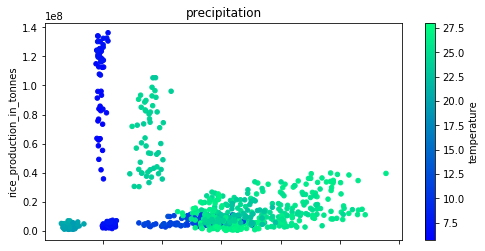

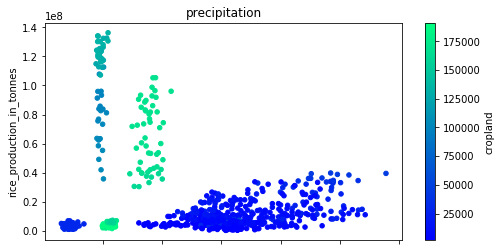

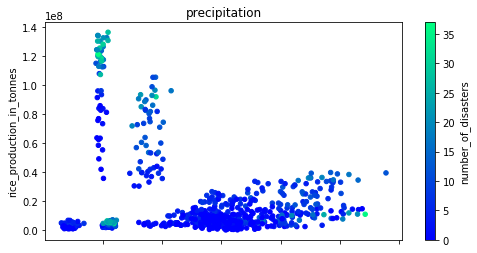

In [15]:
# color scatterplots for rice_production vs precipitation: color represents othe predictors
df_top.plot(kind='scatter', x='precipitation', y='rice_production_in_tonnes', \
        c='temperature', colormap='winter', figsize=(8,4))
plt.title('precipitation')

df_top.plot(kind='scatter', x='precipitation', y='rice_production_in_tonnes', \
        c='cropland', colormap='winter', figsize=(8,4))
plt.title('precipitation')

df_top.plot(kind='scatter', x='precipitation', y='rice_production_in_tonnes', \
        c='number_of_disasters', colormap='winter', figsize=(8,4))
plt.title('precipitation')

Text(0.5, 1.0, 'temperature')

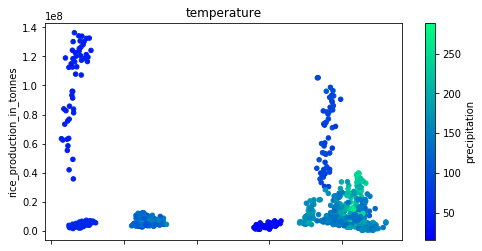

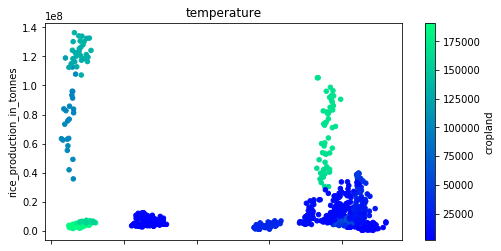

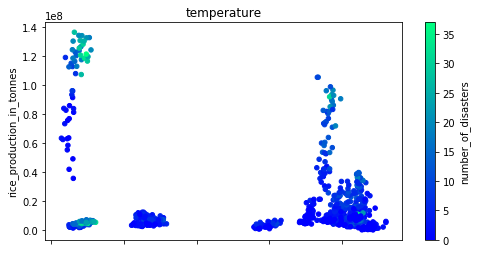

In [16]:
# color scatterplots for rice_production vs temperature: color represents othe predictors
df_top.plot(kind='scatter', x='temperature', y='rice_production_in_tonnes', \
        c='precipitation', colormap='winter', figsize=(8,4))
plt.title('temperature')

df_top.plot(kind='scatter', x='temperature', y='rice_production_in_tonnes', \
        c='cropland', colormap='winter', figsize=(8,4))
plt.title('temperature')

df_top.plot(kind='scatter', x='temperature', y='rice_production_in_tonnes', \
        c='number_of_disasters', colormap='winter', figsize=(8,4))
plt.title('temperature')

best fit line:
y = 38981988.25 + -140423.68x


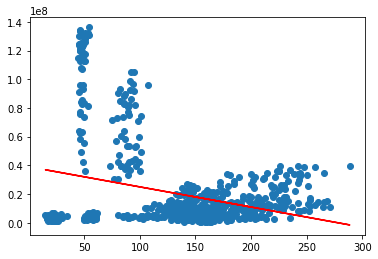

In [17]:
# fit a line to: rice_production vs precipitation
X = df_top['precipitation'].to_numpy()
Y = df_top['rice_production_in_tonnes'].to_numpy()

# solve for a and b
def best_fit(X, Y):

    xbar = sum(X)/len(X)
    ybar = sum(Y)/len(Y)
    n = len(X) # or len(Y)

    numer = sum([xi*yi for xi,yi in zip(X, Y)]) - n * xbar * ybar
    denum = sum([xi**2 for xi in X]) - n * xbar**2

    b = numer / denum
    a = ybar - b * xbar

    print('best fit line:\ny = {:.2f} + {:.2f}x'.format(a, b))

    return a, b

# solution
a, b = best_fit(X, Y)
#best fit line:
#y = 0.80 + 0.92x

# plot points and fit line
plt.scatter(X, Y)
yfit = [a + b * xi for xi in X]
plt.plot(X, yfit,'r')

best fit line:
y = -3167113.93 + 87178.98x


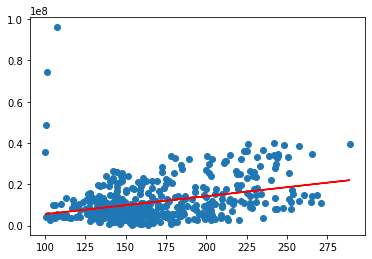

In [18]:
# fit a line to: rice_production vs precipitation after filtering for precipitation>100
X = df_top[df_top['precipitation']>100]['precipitation'].to_numpy()
Y = df_top[df_top['precipitation']>100]['rice_production_in_tonnes'].to_numpy()

# solve for a and b
def best_fit(X, Y):

    xbar = sum(X)/len(X)
    ybar = sum(Y)/len(Y)
    n = len(X) # or len(Y)

    numer = sum([xi*yi for xi,yi in zip(X, Y)]) - n * xbar * ybar
    denum = sum([xi**2 for xi in X]) - n * xbar**2

    b = numer / denum
    a = ybar - b * xbar

    print('best fit line:\ny = {:.2f} + {:.2f}x'.format(a, b))

    return a, b

# solution
a, b = best_fit(X, Y)
#best fit line:
#y = 0.80 + 0.92x

# plot points and fit line
plt.scatter(X, Y)
yfit = [a + b * xi for xi in X]
plt.plot(X, yfit,'r')

best fit line:
y = 42682929.49 + -1111304.62x


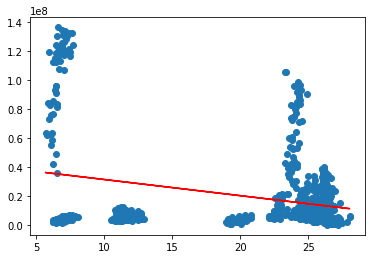

In [19]:
# fit a line to: rice_production vs temperature
X = df_top['temperature'].to_numpy()
Y = df_top['rice_production_in_tonnes'].to_numpy()

# solve for a and b
def best_fit(X, Y):

    xbar = sum(X)/len(X)
    ybar = sum(Y)/len(Y)
    n = len(X) # or len(Y)

    numer = sum([xi*yi for xi,yi in zip(X, Y)]) - n * xbar * ybar
    denum = sum([xi**2 for xi in X]) - n * xbar**2

    b = numer / denum
    a = ybar - b * xbar

    print('best fit line:\ny = {:.2f} + {:.2f}x'.format(a, b))

    return a, b

# solution
a, b = best_fit(X, Y)
#best fit line:
#y = 0.80 + 0.92x

# plot points and fit line
plt.scatter(X, Y)
yfit = [a + b * xi for xi in X]
plt.plot(X, yfit,'r')

best fit line:
y = 10086788.37 + 252217.55x


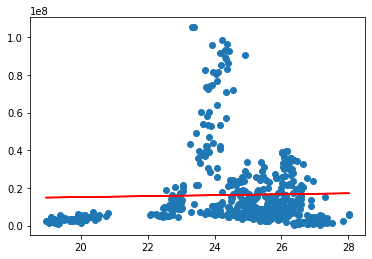

In [20]:
# fit a line to: rice_production vs temperature after filtering for temperature>18
X = df_top[df_top['temperature']>18]['temperature'].to_numpy()
Y = df_top[df_top['temperature']>18]['rice_production_in_tonnes'].to_numpy()

# solve for a and b
def best_fit(X, Y):

    xbar = sum(X)/len(X)
    ybar = sum(Y)/len(Y)
    n = len(X) # or len(Y)

    numer = sum([xi*yi for xi,yi in zip(X, Y)]) - n * xbar * ybar
    denum = sum([xi**2 for xi in X]) - n * xbar**2

    b = numer / denum
    a = ybar - b * xbar

    print('best fit line:\ny = {:.2f} + {:.2f}x'.format(a, b))

    return a, b

# solution
a, b = best_fit(X, Y)
#best fit line:
#y = 0.80 + 0.92x

# plot points and fit line
plt.scatter(X, Y)
yfit = [a + b * xi for xi in X]
plt.plot(X, yfit,'r')

best fit line:
y = 8375900.27 + 256.95x


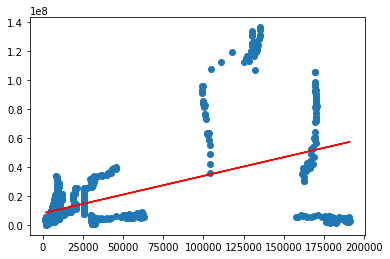

In [21]:
# fit a line to: rice_production vs cropland
X = df_top['cropland'].to_numpy()
Y = df_top['rice_production_in_tonnes'].to_numpy()

# solve for a and b
def best_fit(X, Y):

    xbar = sum(X)/len(X)
    ybar = sum(Y)/len(Y)
    n = len(X) # or len(Y)

    numer = sum([xi*yi for xi,yi in zip(X, Y)]) - n * xbar * ybar
    denum = sum([xi**2 for xi in X]) - n * xbar**2

    b = numer / denum
    a = ybar - b * xbar

    print('best fit line:\ny = {:.2f} + {:.2f}x'.format(a, b))

    return a, b

# solution
a, b = best_fit(X, Y)
#best fit line:
#y = 0.80 + 0.92x

# plot points and fit line
plt.scatter(X, Y)
yfit = [a + b * xi for xi in X]
plt.plot(X, yfit,'r')

In [22]:
# Predictors
X = df_top[['number_of_disasters', 'total_human_affected', 'temperature',
       'precipitation', 'cropland']].to_numpy()

# Response
Y = df_top['rice_production_in_tonnes'].to_numpy()

# linear regression model
reg = LinearRegression(fit_intercept=True, normalize=True, copy_X=True)
reg.fit(X, Y)
Y_predicted = reg.predict(X)

# R-squared Value
print('coefficient of determination:', reg.score(X, Y))

# Print coefficients
print('coefficients:', reg.coef_) 

coefficient of determination: 0.46401770672920356
coefficients: [ 7.49365699e+05  3.38064202e-01 -1.80659164e+05  5.73058513e+03
  1.43387850e+02]


Text(0, 0.5, 'rice production (tonnes): actual-predicted')

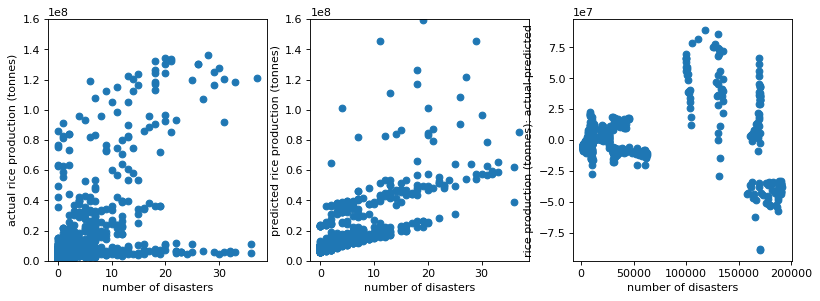

In [23]:
# scatterplots for actual and predicted/modeled rice_productin and their difference (error) vs number_of_disasters
from matplotlib.pyplot import figure
figure(figsize=(12, 4), dpi=80)

plt.subplot(1, 3, 1)
plt.scatter(X[:,0],Y);
plt.ylim(0,1.6e8)
plt.xlabel('number of disasters')
plt.ylabel('actual rice production (tonnes)')

plt.subplot(1, 3, 2)
plt.scatter(X[:,0],Y_predicted);
plt.ylim(0,1.6e8)
plt.xlabel('number of disasters')
plt.ylabel('predicted rice production (tonnes)')

plt.subplot(1, 3, 3)
plt.scatter(X[:,4],Y - Y_predicted);
plt.xlabel('number of disasters')
plt.ylabel('rice production (tonnes): actual-predicted')

Text(0, 0.5, 'rice production (tonnes): actual-predicted')

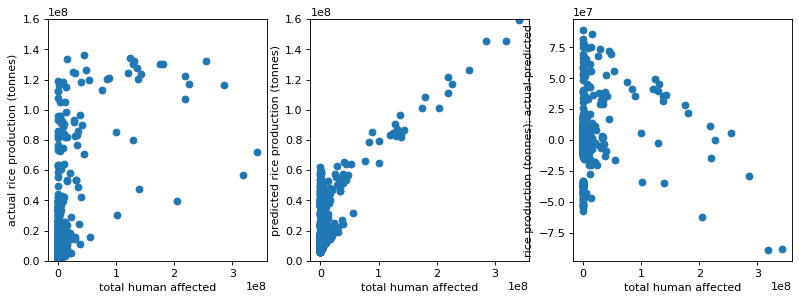

In [24]:
# scatterplots for actual and predicted/modeled rice_productin and their difference (error) vs total_human_affected
from matplotlib.pyplot import figure
figure(figsize=(12, 4), dpi=80)

plt.subplot(1, 3, 1)
plt.scatter(X[:,1],Y);
plt.ylim(0,1.6e8)
plt.xlabel('total human affected')
plt.ylabel('actual rice production (tonnes)')

plt.subplot(1, 3, 2)
plt.scatter(X[:,1],Y_predicted);
plt.ylim(0,1.6e8)
plt.xlabel('total human affected')
plt.ylabel('predicted rice production (tonnes)')

plt.subplot(1, 3, 3)
plt.scatter(X[:,1],Y - Y_predicted);
plt.xlabel('total human affected')
plt.ylabel('rice production (tonnes): actual-predicted')

Text(0, 0.5, 'rice production (tonnes): actual-predicted')

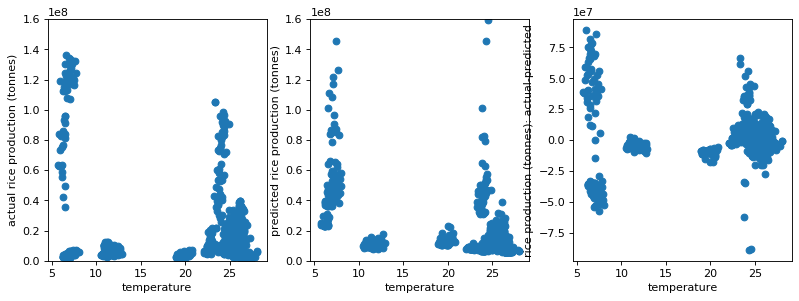

In [25]:
# scatterplots for actual and predicted/modeled rice_productin and their difference (error) vs temperature
from matplotlib.pyplot import figure
figure(figsize=(12, 4), dpi=80)

plt.subplot(1, 3, 1)
plt.scatter(X[:,2],Y);
plt.ylim(0,1.6e8)
plt.xlabel('temperature')
plt.ylabel('actual rice production (tonnes)')

plt.subplot(1, 3, 2)
plt.scatter(X[:,2],Y_predicted);
plt.ylim(0,1.6e8)
plt.xlabel('temperature')
plt.ylabel('predicted rice production (tonnes)')

plt.subplot(1, 3, 3)
plt.scatter(X[:,2],Y - Y_predicted);
plt.xlabel('temperature')
plt.ylabel('rice production (tonnes): actual-predicted')

Text(0, 0.5, 'rice production (tonnes): actual-predicted')

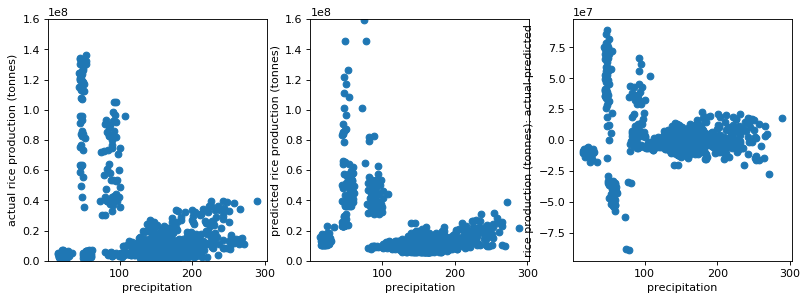

In [26]:
# scatterplots for actual and predicted/modeled rice_productin and their difference (error) vs precipitation
from matplotlib.pyplot import figure
figure(figsize=(12, 4), dpi=80)

plt.subplot(1, 3, 1)
plt.scatter(X[:,3],Y);
plt.ylim(0,1.6e8)
plt.xlabel('precipitation')
plt.ylabel('actual rice production (tonnes)')

plt.subplot(1, 3, 2)
plt.scatter(X[:,3],Y_predicted);
plt.ylim(0,1.6e8)
plt.xlabel('precipitation')
plt.ylabel('predicted rice production (tonnes)')

plt.subplot(1, 3, 3)
plt.scatter(X[:,3],Y - Y_predicted);
plt.xlabel('precipitation')
plt.ylabel('rice production (tonnes): actual-predicted')

Text(0, 0.5, 'rice production (tonnes): actual-predicted')

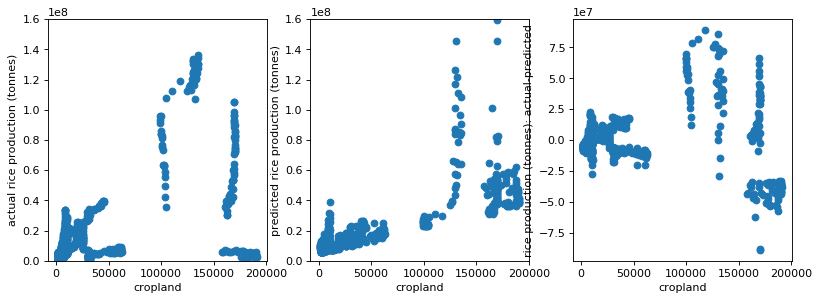

In [27]:
# scatterplots for actual and predicted/modeled rice_productin and their difference (error) vs cropland
from matplotlib.pyplot import figure
figure(figsize=(12, 4), dpi=80)

plt.subplot(1, 3, 1)
plt.scatter(X[:,4],Y);
plt.ylim(0,1.6e8)
plt.xlabel('cropland')
plt.ylabel('actual rice production (tonnes)')

plt.subplot(1, 3, 2)
plt.scatter(X[:,4],Y_predicted);
plt.ylim(0,1.6e8)
plt.xlabel('cropland')
plt.ylabel('predicted rice production (tonnes)')

plt.subplot(1, 3, 3)
plt.scatter(X[:,4],Y - Y_predicted);
plt.xlabel('cropland')
plt.ylabel('rice production (tonnes): actual-predicted')

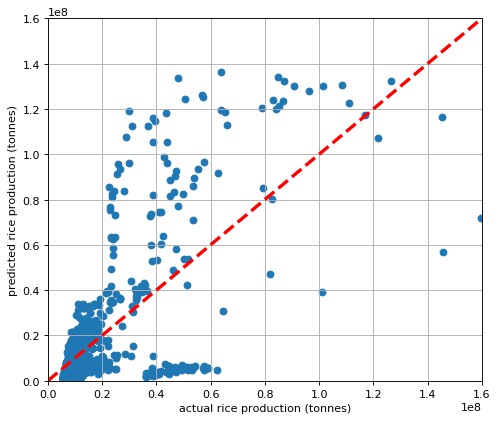

In [28]:
from matplotlib.pyplot import figure
figure(figsize=(7,6), dpi=80)
plt.scatter(Y_predicted,Y);
plt.ylim(0,1.6e8)
plt.xlim(0,1.6e8)
plt.xlabel('actual rice production (tonnes)')
plt.ylabel('predicted rice production (tonnes)')
plt.grid()
xpoints = ypoints = plt.xlim()
plt.plot(xpoints, ypoints, linestyle='--', color='r', lw=3, scalex=False, scaley=False)

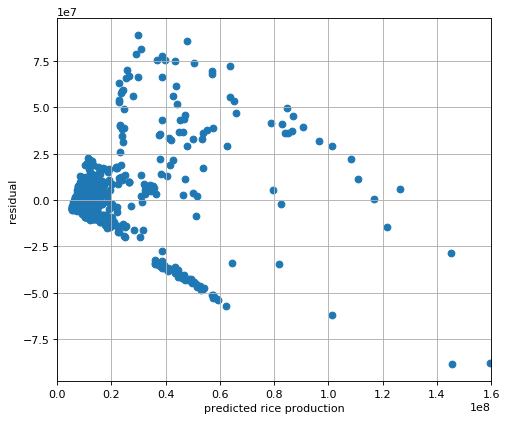

In [29]:
from matplotlib.pyplot import figure
figure(figsize=(7,6), dpi=80)
plt.scatter(Y_predicted,Y - Y_predicted);
plt.xlim(0,1.6e8)
plt.xlabel('predicted rice production')
plt.ylabel('residual')
plt.grid()